# 🎵 Análise de Popularidade de Músicas do Spotify

## Objetivo
Este estudo tem como objetivo analisar e prever a **popularidade de músicas** utilizando técnicas de Machine Learning, a partir de características de áudio extraídas do Spotify.

## Dataset
- **Fonte:** Spotify Dataset com 114.000 músicas
- **Features:** 21 colunas incluindo características de áudio (danceability, energy, loudness, etc.)
- **Target:** `popularity` (0-100)

## Metodologia
1. **Análise Exploratória (EDA)** - Entendimento dos dados
2. **Tratamento de Dados** - Limpeza e feature engineering
3. **Testes Estatísticos** - Validação de hipóteses
4. **Modelagem** - Regressão e Classificação
5. **Otimização** - Tuning de hiperparâmetros

---


In [ ]:

!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install scikit-learn
!pip install statsmodels
# !pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from scipy import stats
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report)
from pycaret.regression import setup, compare_models, tune_model, pull


## 1. Carregamento dos Dados

Carregando o dataset do Spotify com informações de músicas e suas características de áudio.

In [4]:
# Set the path to the file you'd like to load
file_path = "../dataset.csv"

# Load the latest version
df = pd.read_csv(file_path)
print("First 5 records:", df.head())

First 5 records:    Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210

In [ ]:

!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install scikit-learn
!pip install statsmodels
# !pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

### 1.1 Exploração Inicial

Verificando dimensões, tipos de dados, valores nulos e duplicados.

In [21]:
df.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [22]:
# Dimensões e colunas
print(f"Shape: {df.shape}")
print(f"\nColunas:\n{df.columns.tolist()}")

Shape: (114000, 21)

Colunas:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [23]:
# verificando se há valores nulos
df.isnull().sum()

# verificar o valor nulo em album_name
df[df['album_name'].isnull()]

# valor nulo sem muitas infos, retirar
df = df.dropna(subset=['album_name'])



In [24]:
# verificando se há valores duplicados
df.duplicated().sum()

0

In [25]:
# verificando se há valores únicos
df.nunique()

Unnamed: 0          113999
track_id             89740
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50696
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45652
time_signature           5
track_genre            114
dtype: int64

## 2. Análise Exploratória de Dados (EDA)

Nesta seção, realizamos uma análise visual e estatística das features do dataset para entender melhor os padrões e relações entre as variáveis.

In [26]:
# config de seaborn e plot
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

In [27]:
print(f"\nShape: {df.shape[0]:,} linhas x {df.shape[1]} colunas\n")
df.info()


Shape: 113,999 linhas x 21 colunas

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  f

In [5]:
# Dropar colunas não relevantes
columns_to_drop = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']

df = df.drop(columns=columns_to_drop)

# dropar track_id por ser apenas id, track_name nao importa, artist_name e album_name nao importam na analise que sera feita (em outras analises podem ser relevantes)

# Verificar a estrutura do DataFrame após a remoção
print("\nEstrutura do DataFrame após a remoção:")
df.info()



Estrutura do DataFrame após a remoção:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non

### 2.1 Análise de Outliers

Utilizando o método IQR (Interquartile Range) para identificar e visualizar outliers nas variáveis numéricas.


popularity          :      2 outliers (0.00%) | Limites: [-32.50, 99.50]
duration_ms         :  5,617 outliers (4.93%) | Limites: [42906.00, 392666.00]
danceability        :    620 outliers (0.54%) | Limites: [0.10, 1.05]
loudness            :  6,173 outliers (5.41%) | Limites: [-17.53, 2.51]
speechiness         : 13,211 outliers (11.59%) | Limites: [-0.04, 0.16]
instrumentalness    : 25,246 outliers (22.15%) | Limites: [-0.07, 0.12]
liveness            :  8,642 outliers (7.58%) | Limites: [-0.16, 0.54]
tempo               :    617 outliers (0.54%) | Limites: [37.94, 201.35]


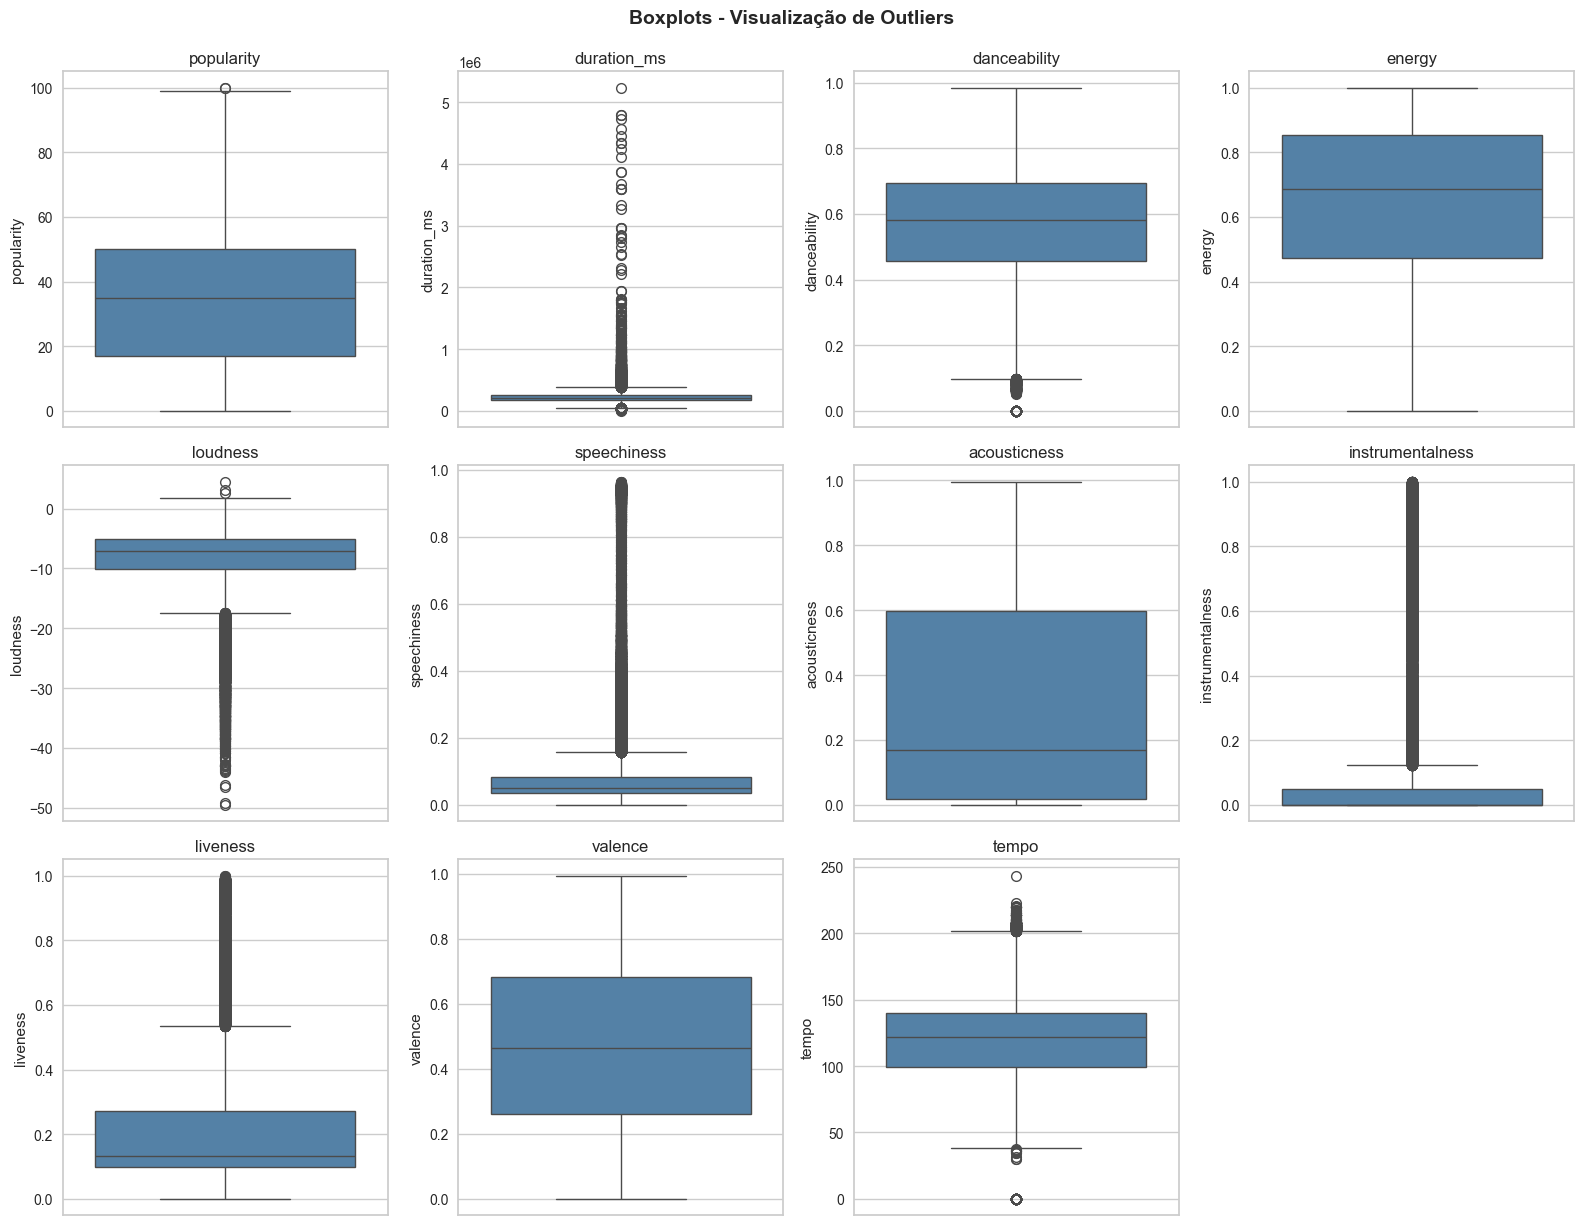

In [6]:
def find_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return len(outliers), lower_bound, upper_bound

# colunas numericas para verificar outliers
numericas = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
             'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
             'valence', 'tempo']

# verificando outliers
for col in numericas:
    n_outliers, lower, upper = find_outliers(df, col)
    pct = (n_outliers / len(df) * 100)
    if n_outliers > 0:
        print(f"{col:20s}: {n_outliers:6,} outliers ({pct:.2f}%) | Limites: [{lower:.2f}, {upper:.2f}]")


fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numericas):
    sns.boxplot(y=df[col], ax=axes[i], color='steelblue')
    axes[i].set_title(col, fontsize=12)

axes[-1].axis('off')

plt.tight_layout()
plt.suptitle('Boxplots - Visualização de Outliers', y=1.02, fontsize=14, fontweight='bold')
plt.show()


In [7]:
# filtrar musicas, muitos outliers em duration_ms

# musicas com menos de 40 segundos ou maiores que 11 minutos, serão removidas
THIRTY_SECONDS_MS = 30 * 1000
TEN_MINUTES_MS = 10* 60 * 1000
df = df[df['duration_ms'].between(THIRTY_SECONDS_MS, TEN_MINUTES_MS)]

# verificando se há outliers apos a remocao
for col in numericas:
    n_outliers, lower, upper = find_outliers(df, col)
    pct = (n_outliers / len(df) * 100)
    if n_outliers > 0:
        print(f"{col:20s}: {n_outliers:6,} outliers ({pct:.2f}%) | Limites: [{lower:.2f}, {upper:.2f}]")

print(f"Shape final: {df.shape}")
# o shape diminui de 114000 para 113380, 620 musicas foram removidas

popularity          :      2 outliers (0.00%) | Limites: [-32.50, 99.50]
duration_ms         :  5,169 outliers (4.56%) | Limites: [44108.12, 390345.12]
danceability        :    624 outliers (0.55%) | Limites: [0.10, 1.05]
loudness            :  6,108 outliers (5.39%) | Limites: [-17.47, 2.49]
speechiness         : 13,139 outliers (11.59%) | Limites: [-0.04, 0.16]
instrumentalness    : 25,069 outliers (22.11%) | Limites: [-0.07, 0.12]
liveness            :  8,533 outliers (7.53%) | Limites: [-0.16, 0.54]
tempo               :    613 outliers (0.54%) | Limites: [37.98, 201.34]
Shape final: (113380, 16)


### 2.2 Análise de Correlação

Analisando as correlações entre as features numéricas e a variável target (popularity).

**Principais Descobertas:**
- ⚠️ Nenhuma feature de áudio tem correlação forte com `popularity`
- Isso sugere que o sucesso de uma música depende mais de fatores externos (artista, marketing, timing) do que das características técnicas

**Correlações fortes entre features:**
- `energy` ↔ `loudness` (positiva)
- `energy` ↔ `acousticness` (negativa)
- `danceability` ↔ `valence` (positiva)


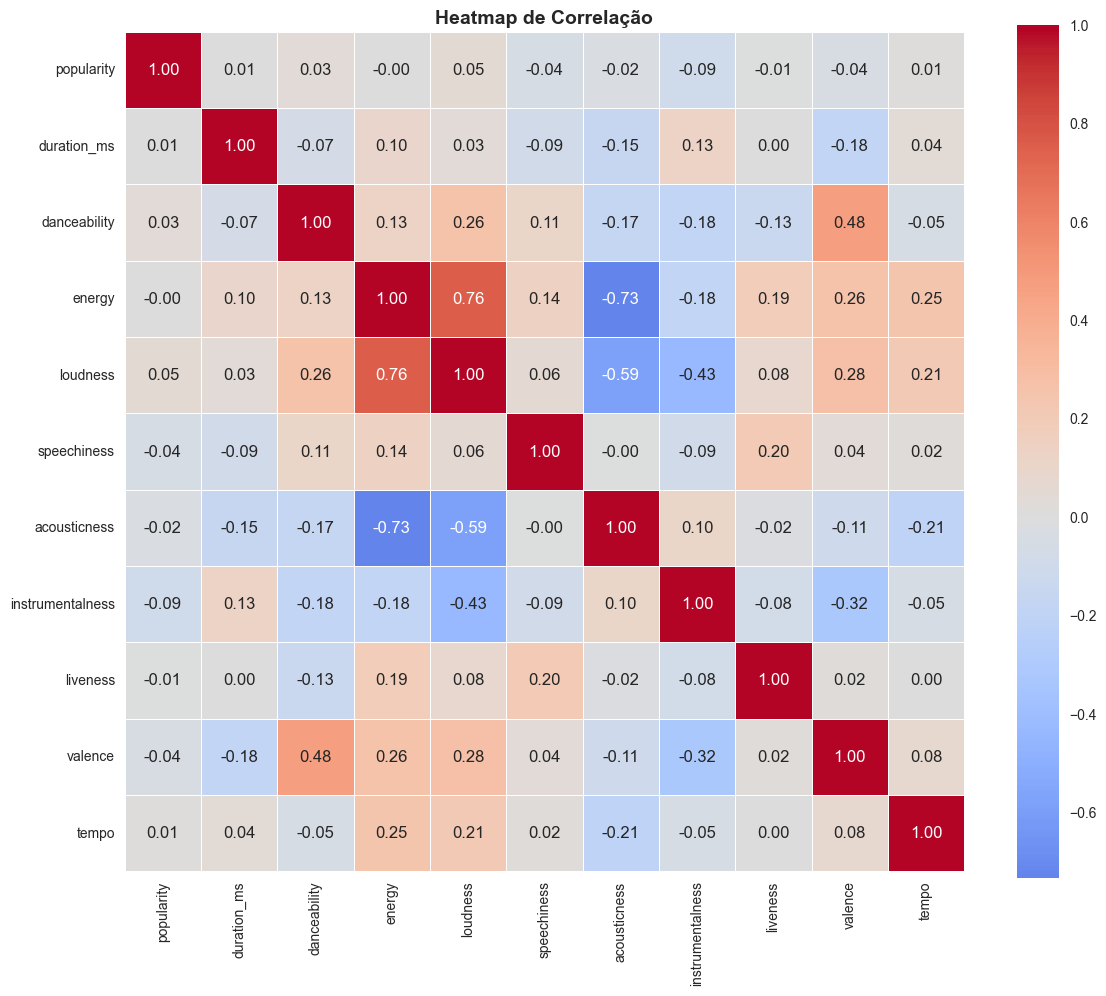

loudness            0.047
danceability        0.034
tempo               0.012
duration_ms         0.009
energy             -0.001
liveness           -0.005
acousticness       -0.024
valence            -0.043
speechiness        -0.045
instrumentalness   -0.092
Name: popularity, dtype: float64


In [31]:
plt.figure(figsize=(12, 10))

correlacao = df[numericas].corr()

sns.heatmap(correlacao, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5)

plt.title('Heatmap de Correlação', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

corr_popularity = correlacao['popularity'].drop('popularity').sort_values(ascending=False)
print(corr_popularity.round(3))

In [32]:
# infelizmente, popularidade nao esta correlacionada com nenhuma das outras features, isso explica que nem sempre a parte tecnica da musica é o que determina sua popularidade, mas sim artista, marketing etc.

# temos correlação forte em:
# energy ↔ loudness
# energy ↔ acousticness
# loudness ↔ acousticness
# danceability ↔ valence


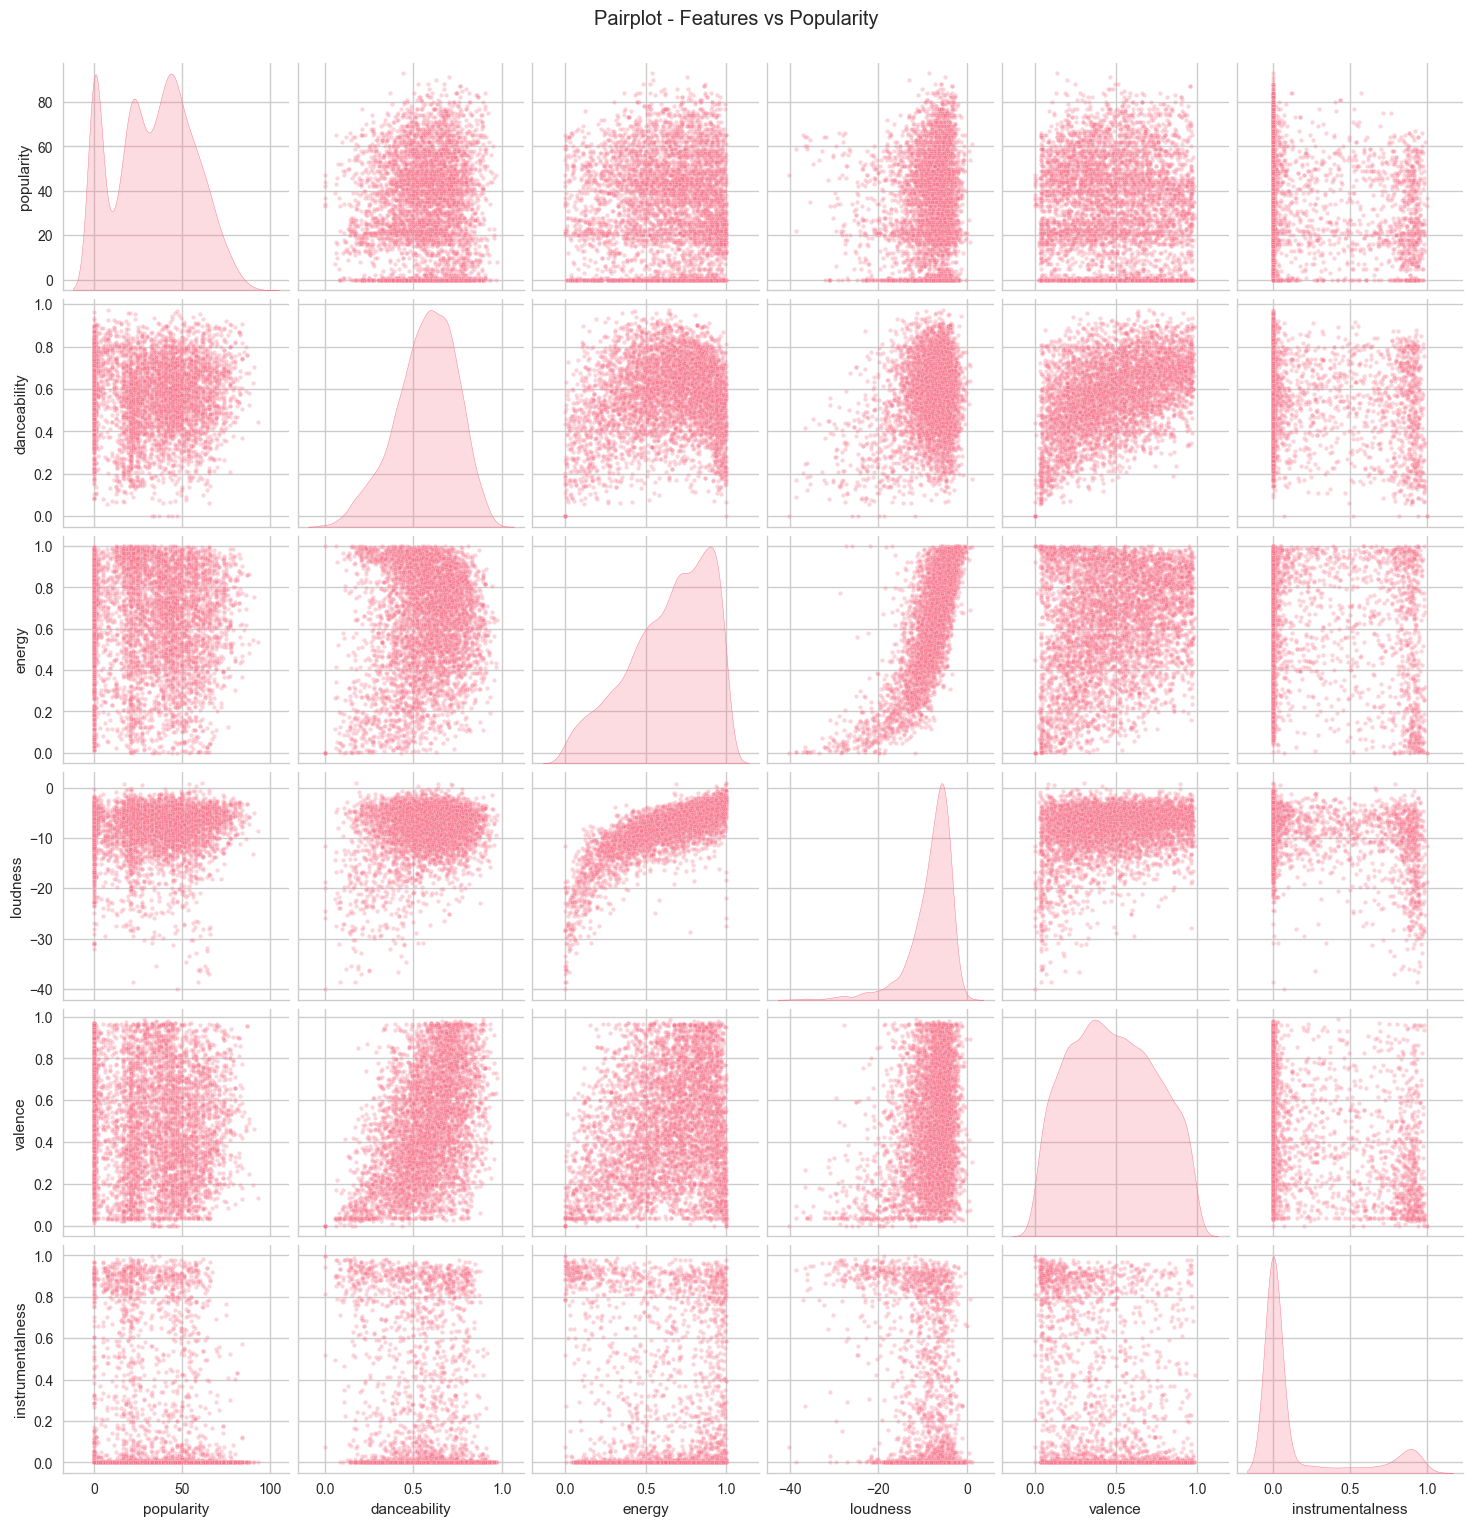

In [33]:
# Pairplot das features mais relevantes
features_pairplot = ['popularity', 'danceability', 'energy', 'loudness', 'valence', 'instrumentalness']

sns.pairplot(df[features_pairplot].sample(5000), 
             diag_kind='kde',
             plot_kws={'alpha': 0.3, 's': 10})
plt.suptitle('Pairplot - Features vs Popularity', y=1.02)
plt.show()

### 2.3 Análise de Gêneros Musicais

O dataset contém **114 gêneros** diferentes. Para facilitar a análise e modelagem, criamos agrupamentos em **macro-gêneros**.


In [34]:
print(f"Total de gêneros: {df['track_genre'].nunique()}")
print(f"\nDistribuição de amostras por gênero:")
print(df['track_genre'].value_counts().describe())

# ver todos os generos
print(df['track_genre'].unique())

# ver quantidade de musicas por genero
print(df['track_genre'].value_counts())



Total de gêneros: 114

Distribuição de amostras por gênero:
count     114.000000
mean      994.561404
std        10.915634
min       941.000000
25%       994.250000
50%       999.000000
75%      1000.000000
max      1000.000000
Name: count, dtype: float64
['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minima

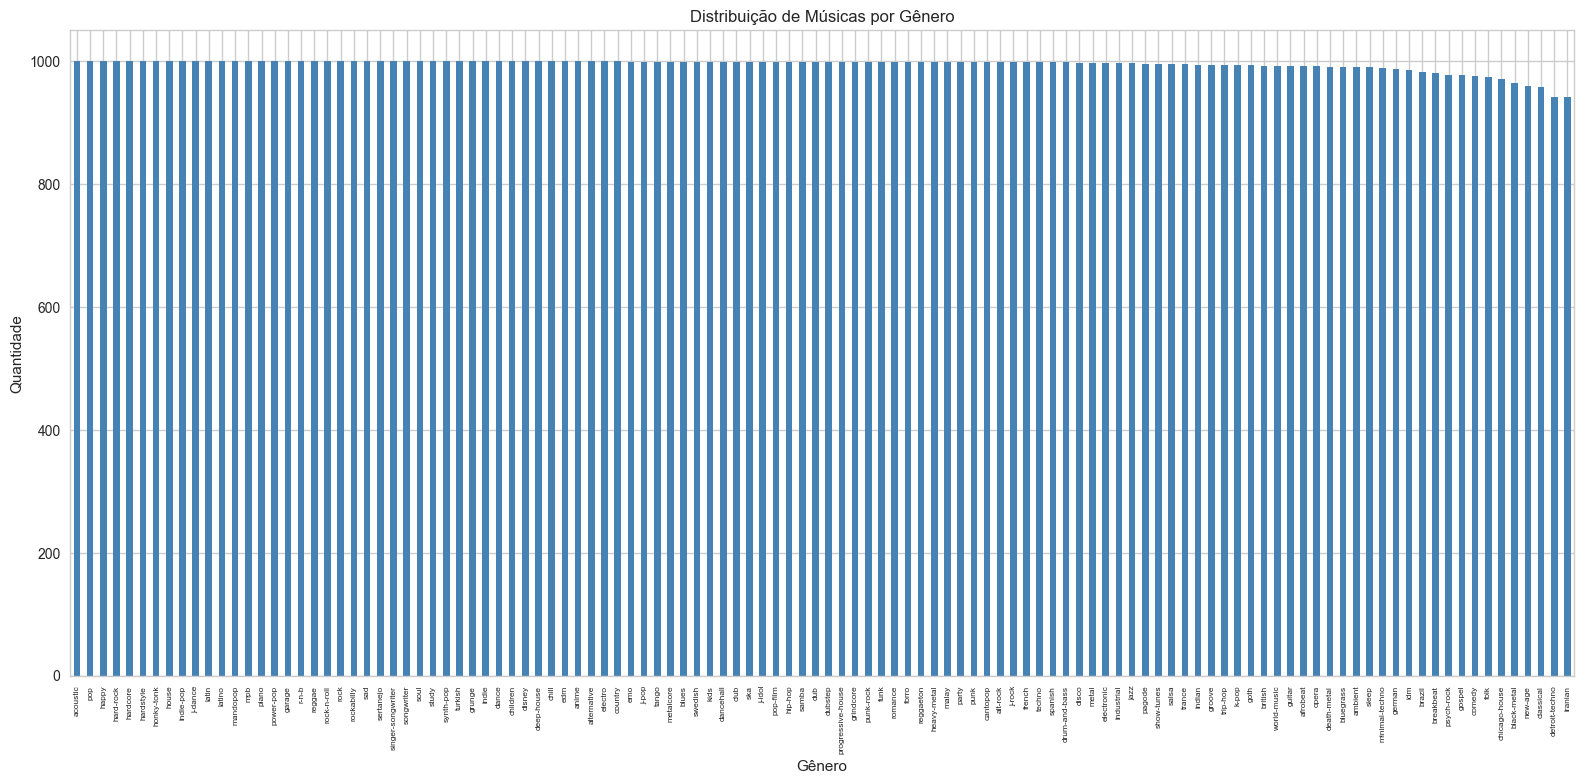

In [35]:
# Visualizar distribuição dos gêneros
plt.figure(figsize=(16, 8))
df['track_genre'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribuição de Músicas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

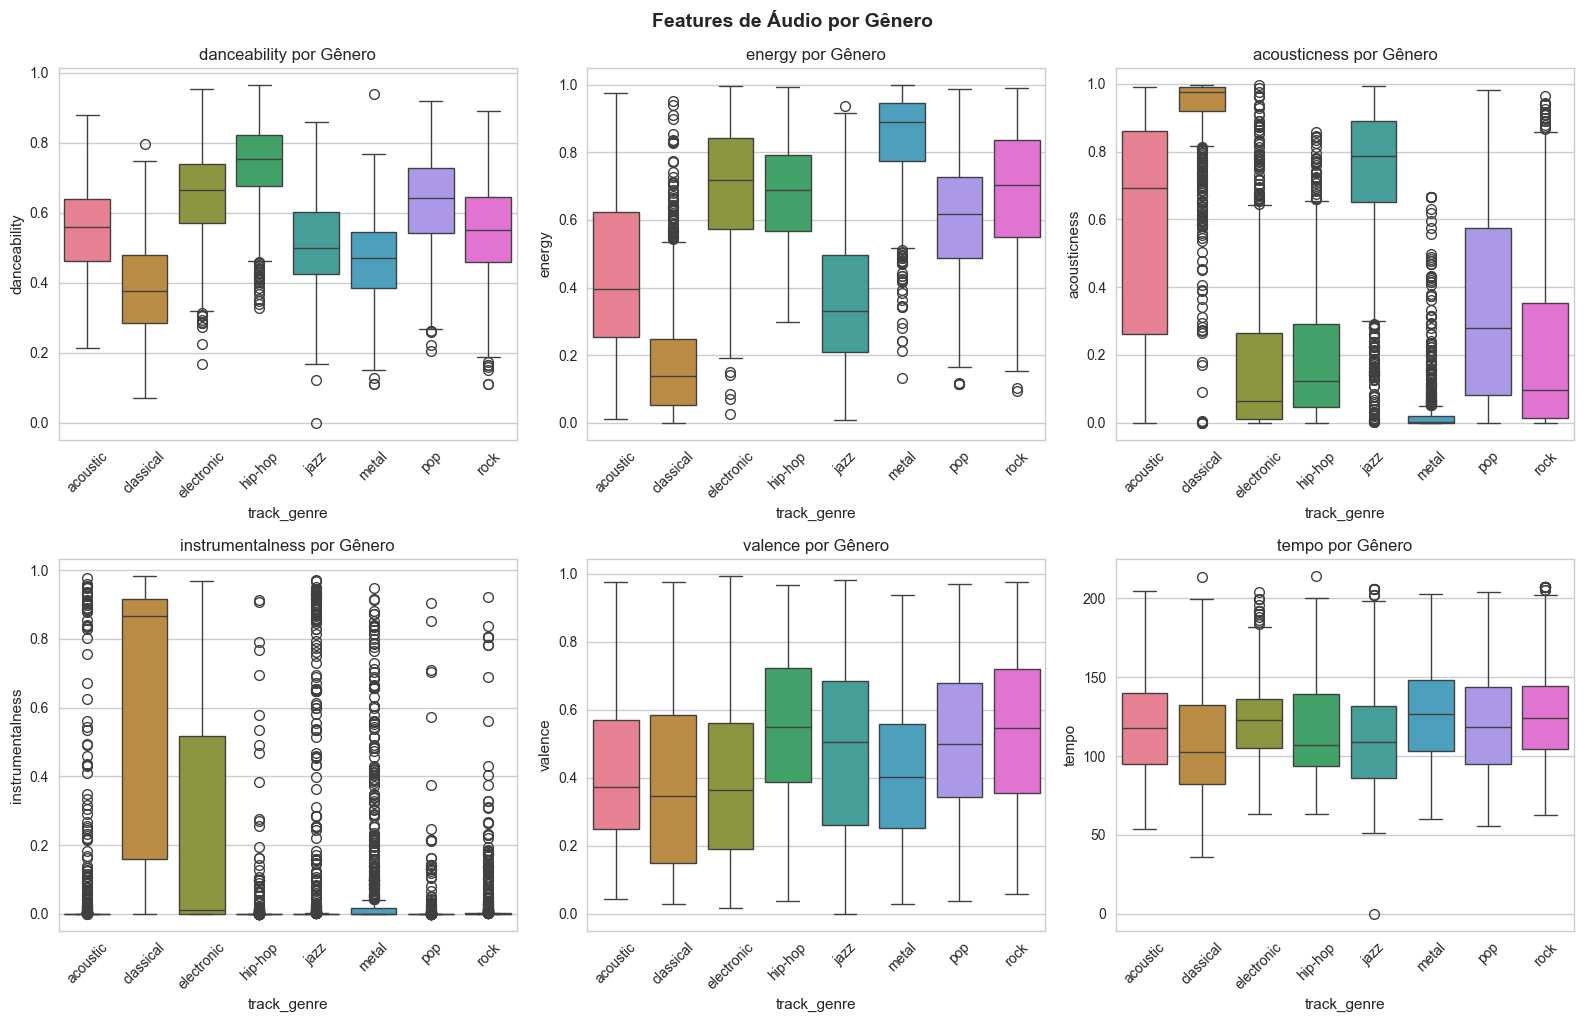

In [36]:
# Comparar features de áudio entre gêneros (amostra de 8 gêneros distintos)
generos_amostra = ['pop', 'rock', 'hip-hop', 'classical', 'electronic', 'jazz', 'metal', 'acoustic']
generos_disponiveis = [g for g in generos_amostra if g in df['track_genre'].values]

df_amostra = df[df['track_genre'].isin(generos_disponiveis)]

# Boxplots de features por gênero
features_audio = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, feat in enumerate(features_audio):
    sns.boxplot(data=df_amostra, x='track_genre', y=feat, ax=axes[i], palette='husl')
    axes[i].set_title(f'{feat} por Gênero')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('Features de Áudio por Gênero', y=1.02, fontsize=14, fontweight='bold')
plt.show()

In [8]:
# Criar mapeamento de macro-gêneros, agrupando generos mais semelhantes
# Mapeamento COMPLETO
macro_genre = {
    # Rock
    'rock': 'rock', 'alt-rock': 'rock', 'hard-rock': 'rock', 'psych-rock': 'rock',
    'punk-rock': 'rock', 'grunge': 'rock', 'punk': 'rock', 'emo': 'rock',
    'indie': 'rock', 'indie-pop': 'rock', 'british': 'rock', 'guitar': 'rock',
    'goth': 'rock', 'j-rock': 'rock', 'alternative': 'rock', 'rock-n-roll': 'rock',
    'rockabilly': 'rock', 'ska': 'rock',
    
    # Metal
    'metal': 'metal', 'heavy-metal': 'metal', 'black-metal': 'metal',
    'death-metal': 'metal', 'metalcore': 'metal', 'grindcore': 'metal',
    'hardcore': 'metal', 'hardstyle': 'metal',
    
    # Pop
    'pop': 'pop', 'power-pop': 'pop', 'k-pop': 'pop', 'j-pop': 'pop',
    'cantopop': 'pop', 'mandopop': 'pop', 'pop-film': 'pop', 'disney': 'pop',
    'j-idol': 'pop', 'j-dance': 'pop', 'anime': 'pop', 'children': 'pop',
    'kids': 'pop', 'happy': 'pop', 'chill': 'pop', 'comedy': 'pop',
    'romance': 'pop', 'sad': 'pop', 'show-tunes': 'pop', 'swedish': 'pop',
    'synth-pop': 'pop',
    
    # Hip-Hop/R&B
    'hip-hop': 'hip-hop', 'r-n-b': 'hip-hop', 'reggae': 'hip-hop',
    'dancehall': 'hip-hop', 'trip-hop': 'hip-hop',
    
    # Electronic/Dance
    'electronic': 'electronic', 'edm': 'electronic', 'house': 'electronic',
    'deep-house': 'electronic', 'progressive-house': 'electronic',
    'detroit-techno': 'electronic', 'minimal-techno': 'electronic',
    'dubstep': 'electronic', 'drum-and-bass': 'electronic',
    'electro': 'electronic', 'dance': 'electronic', 'club': 'electronic',
    'chicago-house': 'electronic', 'breakbeat': 'electronic', 'dub': 'electronic',
    'garage': 'electronic', 'idm': 'electronic', 'industrial': 'electronic',
    'trance': 'electronic', 'techno': 'electronic', 'disco': 'electronic',
    'groove': 'electronic', 'party': 'electronic',
    
    # Classical/Acoustic
    'classical': 'classical', 'opera': 'classical', 'piano': 'classical',
    'acoustic': 'classical', 'new-age': 'classical', 'ambient': 'classical',
    'sleep': 'classical', 'study': 'classical',
    
    # Jazz/Blues
    'jazz': 'jazz-blues', 'blues': 'jazz-blues', 'bluegrass': 'jazz-blues',
    'funk': 'jazz-blues', 'gospel': 'jazz-blues', 'soul': 'jazz-blues',
    
    # Latin/World
    'latin': 'latin-world', 'latino': 'latin-world', 'brazil': 'latin-world',
    'mpb': 'latin-world', 'pagode': 'latin-world', 'forro': 'latin-world',
    'indian': 'latin-world', 'iranian': 'latin-world',
    'malay': 'latin-world', 'afrobeat': 'latin-world', 'french': 'latin-world',
    'german': 'latin-world', 'spanish': 'latin-world', 'turkish': 'latin-world',
    'salsa': 'latin-world', 'sertanejo': 'latin-world', 'tango': 'latin-world',
    'world-music': 'latin-world', 'samba': 'latin-world',
    
    # Country/Folk
    'country': 'country-folk', 'folk': 'country-folk', 'honky-tonk': 'country-folk',
    'singer-songwriter': 'country-folk', 'songwriter': 'country-folk',
}

# Reaplicar
df['macro_genre'] = df['track_genre'].map(macro_genre).fillna('other')

# Verificar resultado
print(df['macro_genre'].value_counts())

macro_genre
electronic      22838
pop             20957
latin-world     18872
rock            17946
metal            7950
classical        7889
jazz-blues       5963
hip-hop          4992
country-folk     4974
other             999
Name: count, dtype: int64


## 3. Feature Engineering

Criação de novas features para melhorar o poder preditivo do modelo:

1. **Target Encoding (genre_popularity):** Média de popularidade por gênero
2. **Interações:** Combinações de features existentes

**Resultado:** Apenas `genre_popularity` teve correlação significativa (0.503) com a variável target.


In [ ]:
# Feature Engineering
# Vamos gerar novas features que podem ajudar mais tarde

# 1. Target encoding - gênero
genre_means = df.groupby('track_genre')['popularity'].mean()
df['genre_popularity'] = df['track_genre'].map(genre_means)

# 2. Interações
df['energy_x_dance'] = df['energy'] * df['danceability']
df['loud_x_energy'] = df['loudness'] * df['energy']


novas_features = ['genre_popularity', 'energy_x_dance', 'loud_x_energy']
for feat in novas_features:
    corr = df[feat].corr(df['popularity'])
    print(f"{feat:25s}: {corr:.3f}")

# apenas genre_popularity teve correlação significativa com popularity, 0.503, outros fracos ou praticamente nula

genre_popularity         : 0.503
energy_x_dance           : 0.005
loud_x_energy            : 0.040


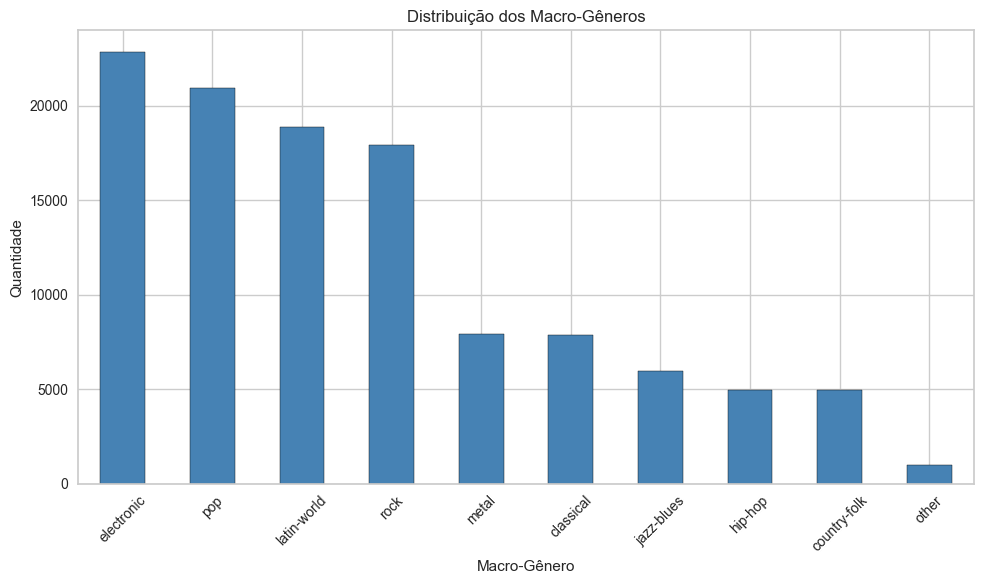

In [10]:
# Visualizar distribuição
plt.figure(figsize=(10, 6))
df['macro_genre'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribuição dos Macro-Gêneros')
plt.xlabel('Macro-Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Ver quais gêneros foram para 'other'
generos_other = df[df['macro_genre'] == 'other']['track_genre'].unique()
print(f"Gêneros em 'other' ({len(generos_other)}):")
print(sorted(generos_other))

Gêneros em 'other' (1):
['reggaeton']


## 4. Testes Estatísticos

Validação de hipóteses usando testes estatísticos apropriados para entender melhor as relações entre as variáveis.

### 4.1 T-Test: Conteúdo Explícito vs Popularidade

**Hipóteses:**
- **H₀:** Músicas com conteúdo explícito têm a mesma popularidade
- **H₁:** Músicas com conteúdo explícito têm popularidade diferente

In [41]:
# T-TEST para a seguinte hipotese: 
# H0: "Músicas com conteúdo explícito têm popularidade igual"
# H3: "Músicas com conteúdo explícito têm popularidade diferente"

explicit_music = df[df['explicit'] == 1]
non_explicit_music = df[df['explicit'] == 0]

t_stat, p_value = stats.ttest_ind(explicit_music['popularity'], non_explicit_music['popularity'])

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")
# p value é 0,000, rejeitamos a hipotese nula, ou seja, músicas com conteúdo explícito têm popularidade diferente

T-statistic: 14.735
P-value: 0.000


**Resultado:** P-value = 0.000 → Rejeitamos H₀. Músicas com conteúdo explícito têm popularidade estatisticamente diferente.

---

### 4.2 ANOVA: Popularidade entre Macro-Gêneros

**Hipóteses:**
- **H₀:** Todos os gêneros têm a mesma popularidade média
- **H₁:** Pelo menos um gênero tem popularidade diferente


In [42]:
# ANOVA: Popularity entre macro-gêneros
# H0: Todos os gêneros têm mesma popularidade média
# H4: Pelo menos um gênero tem popularidade diferente

groups = [grupo['popularity'].values for nome, grupo in df.groupby('macro_genre')]
f_stat, p_value_anova = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value_anova:.4e}")
print(f"\nMédias por gênero:")
print(df.groupby('macro_genre')['popularity'].mean().sort_values(ascending=False).round(2))

# p value é 0,000, rejeitamos a hipotese nula, além disso, F-statistic é alto, o que indica que há diferenças significativas entre os grupos, ou seja, diferença bem grande de popularidade entre os gêneros

F-statistic: 180.033
P-value: 0.0000e+00

Médias por gênero:
macro_genre
rock            36.70
pop             35.72
latin-world     33.52
classical       32.63
hip-hop         32.60
electronic      32.30
metal           30.70
country-folk    29.35
jazz-blues      27.30
other           23.84
Name: popularity, dtype: float64


**Resultado:** F-statistic = 180.03, P-value ≈ 0 → Rejeitamos H₀. Há diferenças significativas de popularidade entre os gêneros.

**Ranking de Popularidade:** Rock > Pop > Latin-World > Classical > Hip-Hop > Electronic > Metal > Country-Folk > Jazz-Blues

---

### 4.3 Chi-Quadrado: Gênero vs Conteúdo Explícito

Verificando se existe associação entre o gênero musical e a presença de conteúdo explícito.


In [43]:
# chi-quadrado: Existe relação entre gênero musical e conteúdo explícito?

table = pd.crosstab(df['macro_genre'], df['explicit'])
chi2, p_value_chi, dof, expected = stats.chi2_contingency(table)

print(f"Chi²: {chi2:.3f}")
print(f"Graus de liberdade: {dof}")
print(f"P-value: {p_value_chi:.4e}")
# p value é 0,000, rejeitamos a hipotese nula, ou seja, existe relação entre gênero musical e conteúdo explícito
# o valor de chi2 é alto, o que indica que a relação é forte

pct_table = pd.crosstab(df['macro_genre'], df['explicit'], normalize='index') * 100
pct_table.columns = ['Não Explícita %', 'Explícita %']
print(pct_table.sort_values('Explícita %', ascending=False).round(1))
# 

Chi²: 2884.421
Graus de liberdade: 9
P-value: 0.0000e+00
              Não Explícita %  Explícita %
macro_genre                               
other                    78.8         21.2
metal                    81.6         18.4
hip-hop                  81.6         18.4
pop                      89.6         10.4
rock                     92.3          7.7
jazz-blues               92.8          7.2
electronic               92.9          7.1
latin-world              93.3          6.7
country-folk             97.4          2.6
classical                99.0          1.0


**Resultado:** Chi² = 2884.42, P-value ≈ 0 → Existe forte associação entre gênero e conteúdo explícito.

**Insights:**
- Hip-Hop e Metal têm maior % de conteúdo explícito (~18%)
- Classical tem menor % de conteúdo explícito (~1%)

---

### 4.4 Correlação de Pearson: Features vs Popularidade


In [44]:
# CORRELAÇÃO DE PEARSON (com p-values)
features_num = ['danceability', 'energy', 'loudness', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for feat in features_num:
    corr, p_val = pearsonr(df[feat], df['popularity'])
    sig = '✓' if p_val < 0.05 else ''
    print(f"{feat:20s}: r = {corr:+.3f}, p = {p_val:.4e} {sig}")
    if p_val < 0.10:
        print(f"Correlação significativa entre {feat} e popularity")
    else:
        print(f"Não há correlação significativa entre {feat} e popularity")
# 


danceability        : r = +0.034, p = 1.8491e-30 ✓
Correlação significativa entre danceability e popularity
energy              : r = -0.001, p = 7.9877e-01 
Não há correlação significativa entre energy e popularity
loudness            : r = +0.047, p = 8.3961e-57 ✓
Correlação significativa entre loudness e popularity
speechiness         : r = -0.045, p = 2.2084e-51 ✓
Correlação significativa entre speechiness e popularity
acousticness        : r = -0.024, p = 2.2251e-16 ✓
Correlação significativa entre acousticness e popularity
instrumentalness    : r = -0.092, p = 7.4848e-210 ✓
Correlação significativa entre instrumentalness e popularity
liveness            : r = -0.005, p = 7.4733e-02 
Correlação significativa entre liveness e popularity
valence             : r = -0.043, p = 1.0297e-47 ✓
Correlação significativa entre valence e popularity
tempo               : r = +0.012, p = 4.5241e-05 ✓
Correlação significativa entre tempo e popularity


---

## 5. Modelagem

Nesta seção, desenvolvemos modelos de **Regressão** (para prever o valor de popularidade) e **Classificação** (para prever o macro-gênero).

### 5.1 Modelos de Regressão

Objetivo: Prever o valor numérico de `popularity` (0-100)

**Baseline:** Predição usando a média do conjunto de treino
- MAE: 18.87
- RMSE: 22.28

In [45]:
def model_results(name, model, X_test, y_test, labels):
  y_pred = modelo.predict(X_test)
  y_proba = modelo.predict_proba(X_test)
    
  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, average='weighted')
  rec = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
  

#### 5.1.1 Regressão Linear Simples

Usando apenas `genre_popularity` como feature, já que foi a única com correlação significativa (0.503).

In [11]:
# valores numericos
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 
                'tempo', 'duration_ms', 'genre_popularity']

X_reg = df[numeric_features]
y_reg = df['popularity']


# dividir em conjuntos de treino e teste, 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
print(f"Treino: {X_train.shape[0]:,} amostras")
print(f"Teste:  {X_test.shape[0]:,} amostras")

Treino: 90,704 amostras
Teste:  22,676 amostras


In [47]:
# baseline para comparar com o modelo
baseline_pred = y_train.mean()
baseline_rmse = ((y_test - baseline_pred) ** 2).mean() ** 0.5
baseline_mae = (y_test - baseline_pred).abs().mean()

print(f"Média do treino: {baseline_pred:.2f}")
print(f"MAE:  {baseline_mae:.2f}")
print(f"RMSE: {baseline_rmse:.2f}")

Média do treino: 33.28
MAE:  18.87
RMSE: 22.28


In [48]:
# usando genre_popularity como única feature, verificando se é significativa para o modelo
X_simple = sm.add_constant(X_train['genre_popularity'])
X_simple_test = sm.add_constant(X_test['genre_popularity'])

model_simple = sm.OLS(y_train, X_simple).fit()

print(model_simple.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                 3.068e+04
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:52:54   Log-Likelihood:            -3.9720e+05
No. Observations:               90704   AIC:                         7.944e+05
Df Residuals:                   90702   BIC:                         7.944e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0542      0.201  

In [49]:
# Previsões
y_pred_simple = model_simple.predict(X_simple_test)

# Métricas

# MAE (Mean Absolute Error): Erro médio absoluto
# Interpretação: em média, erramos X pontos pra cima ou pra baixo
mae_simple = mean_absolute_error(y_test, y_pred_simple)
# RMSE (Root Mean Squared Error): Raiz do erro quadrático médio  
# Penaliza erros grandes mais que o MAE
rmse_simple = root_mean_squared_error(y_test, y_pred_simple)

# R² (Coeficiente de Determinação): % da variância explicada pelo modelo
# Varia de 0 a 1 (quanto maior, melhor)
r2_simple = r2_score(y_test, y_pred_simple)


print(f"MAE:  {mae_simple:.2f} (baseline: 18.87)")
print(f"RMSE: {rmse_simple:.2f} (baseline: 22.28)")
print(f"R²:   {r2_simple:.4f}")


# comparado o baseline com o modelo, o modelo é melhor, pois o MAE é menor e o RMSE é menor, ou seja, ainda que o modelo nao seja perfeito, ele é melhor que o baseline


MAE:  14.11 (baseline: 18.87)
RMSE: 19.26 (baseline: 22.28)
R²:   0.2526


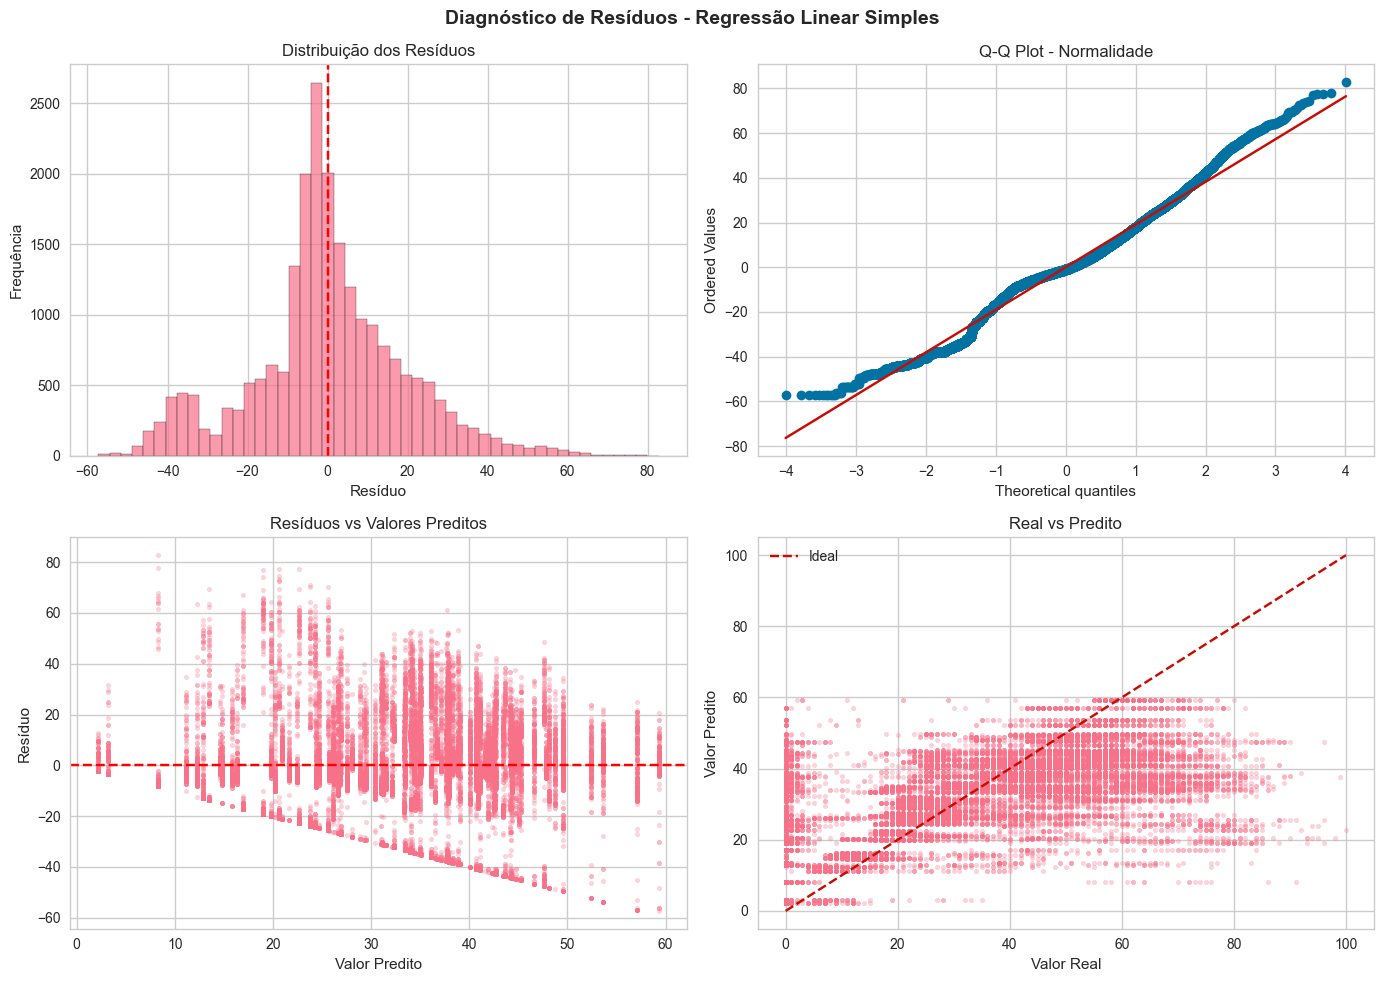


Teste de Shapiro-Wilk (normalidade):
Estatística: 0.9761
P-value: 3.6172e-28
Normal? Não


In [50]:
residuos = y_test - y_pred_simple

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histograma dos resíduos (normalidade)
axes[0, 0].hist(residuos, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(0, color='red', linestyle='--')
axes[0, 0].set_title('Distribuição dos Resíduos')
axes[0, 0].set_xlabel('Resíduo')
axes[0, 0].set_ylabel('Frequência')
# levemente assimétrico, cauda mais longa à esquerda, indicando que os resíduos não são perfeitamente normais, mas ainda um resultado bom.

# 2. Q-Q Plot (normalidade)
stats.probplot(residuos, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot - Normalidade')
# segue a linha com pequenos desvios, indicando que os resíduos são aproximadamente normais

# 3. Resíduos vs Valores Preditos (homocedasticidade)
axes[1, 0].scatter(y_pred_simple, residuos, alpha=0.3, s=10)
axes[1, 0].axhline(0, color='red', linestyle='--')
axes[1, 0].set_title('Resíduos vs Valores Preditos')
axes[1, 0].set_xlabel('Valor Predito')
axes[1, 0].set_ylabel('Resíduo')
# indica sinais de heterocedasticidade, ou seja, a variância dos erros não é constante

# 4. Resíduos vs Valores Reais
axes[1, 1].scatter(y_test, y_pred_simple, alpha=0.3, s=10)
axes[1, 1].plot([0, 100], [0, 100], 'r--', label='Ideal')
axes[1, 1].set_title('Real vs Predito')
axes[1, 1].set_xlabel('Valor Real')
axes[1, 1].set_ylabel('Valor Predito')
axes[1, 1].legend()
# o modelo não consegue prever popularidade muito alta. Ele comprime, dando no maximo 60.

plt.suptitle('Diagnóstico de Resíduos - Regressão Linear Simples', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Teste de normalidade
amostra_residuos = np.random.choice(residuos, size=5000, replace=False)
stat_shapiro, p_shapiro = stats.shapiro(amostra_residuos)
print(f"\nTeste de Shapiro-Wilk (normalidade):")
print(f"Estatística: {stat_shapiro:.4f}")
print(f"P-value: {p_shapiro:.4e}")
print(f"Normal? {'Sim' if p_shapiro > 0.05 else 'Não'}")

#### 5.1.2 Regressão Linear Múltipla

Usando todas as features numéricas disponíveis.

In [51]:
X_multi = sm.add_constant(X_train)
X_multi_test = sm.add_constant(X_test)

model_multi = sm.OLS(y_train, X_multi).fit()

print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     2836.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:52:54   Log-Likelihood:            -3.9700e+05
No. Observations:               90704   AIC:                         7.940e+05
Df Residuals:                   90692   BIC:                         7.941e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1435      0.701  

In [52]:
y_pred_multi = model_multi.predict(X_multi_test)

mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = root_mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"MAE:  {mae_multi:.2f} (simples: 14.11, baseline: 18.87)")
print(f"RMSE: {rmse_multi:.2f} (simples: 19.26, baseline: 22.28)")
print(f"R²:   {r2_multi:.4f} (simples: 0.2526)")


# a melhoria foi minima, o que siginifica que genre_popularity é a feature que tem mais poder preditivo

MAE:  14.08 (simples: 14.11, baseline: 18.87)
RMSE: 19.23 (simples: 19.26, baseline: 22.28)
R²:   0.2554 (simples: 0.2526)


In [53]:
# The condition number is large, 3.23e+06. This might indicate that there are strong multicollinearity or other numerical problems. Isso foi indicado no summary do modelo, vamos investigar


# Calcular VIF para cada feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("VIF - Variance Inflation Factor")
print(vif_data.to_string(index=False))

# energy e loudness tem VIF alto, o que indica que elas tem multicolinearidade, isso afeta a interpretação dos coeficientes, 
# TODO: remover uma delas na otimização

VIF - Variance Inflation Factor
         Feature       VIF
          energy 18.323409
           tempo 16.027290
    danceability 13.624002
genre_popularity  9.467262
     duration_ms  8.948205
        loudness  7.805187
         valence  6.927608
    acousticness  3.676924
        liveness  2.573180
     speechiness  1.861783
instrumentalness  1.843112


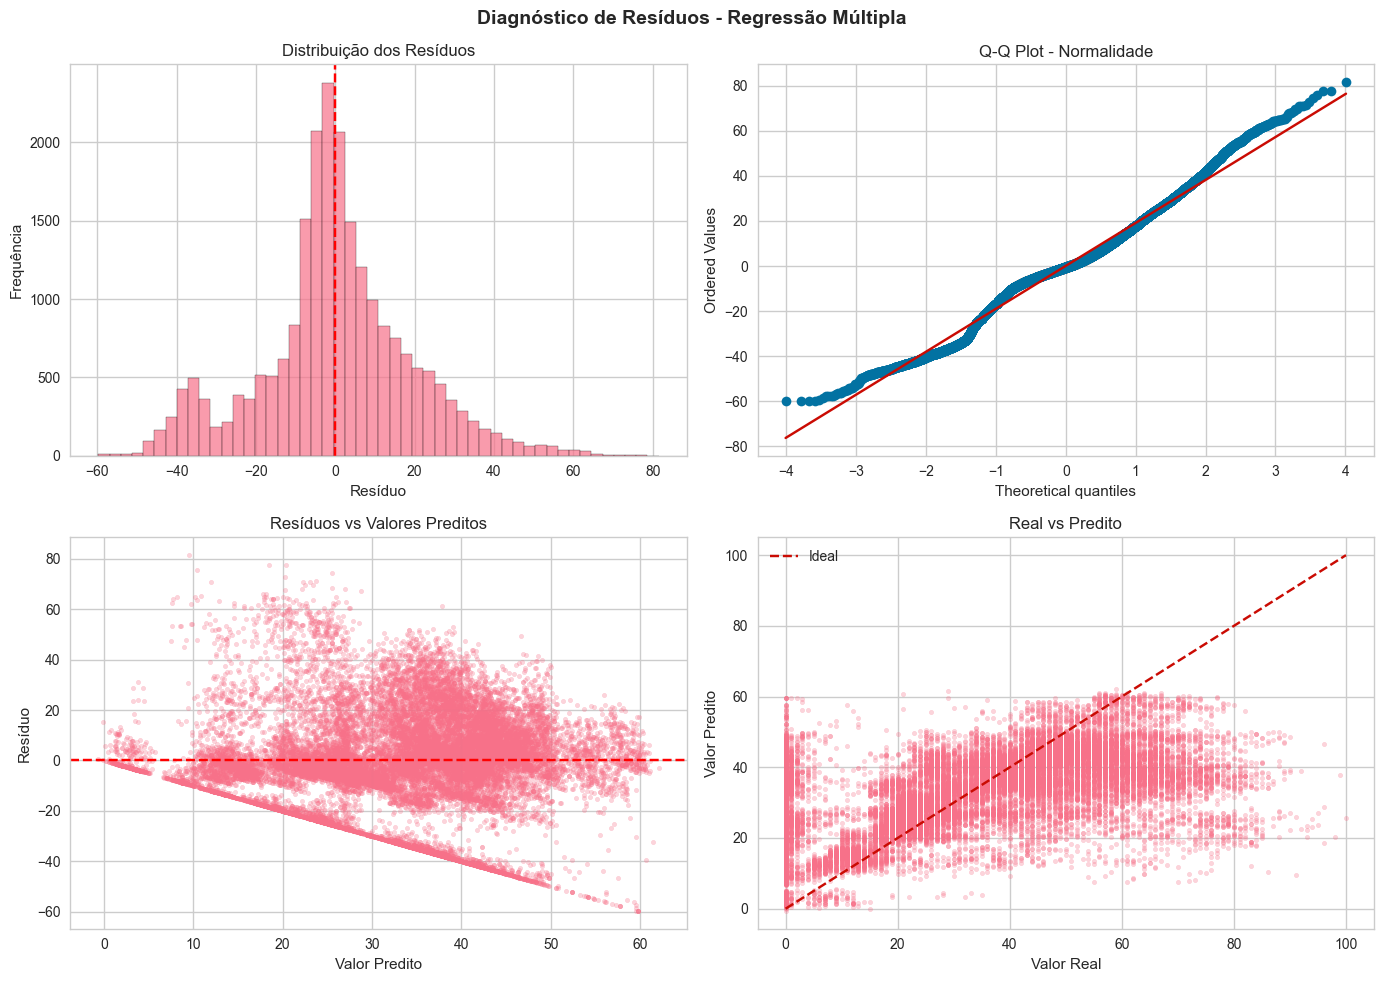


Teste de Shapiro-Wilk (normalidade):
Estatística: 0.9817
P-value: 6.1307e-25
Normal? Não


In [54]:
residuos = y_test - y_pred_multi

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histograma dos resíduos (normalidade)
axes[0, 0].hist(residuos, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(0, color='red', linestyle='--')
axes[0, 0].set_title('Distribuição dos Resíduos')
axes[0, 0].set_xlabel('Resíduo')
axes[0, 0].set_ylabel('Frequência')
# levemente assimétrico, cauda mais longa à esquerda, indicando que os resíduos não são perfeitamente normais, mas ainda um resultado bom.

# 2. Q-Q Plot (normalidade)
stats.probplot(residuos, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot - Normalidade')
# segue a linha com pequenos desvios, indicando que os resíduos são aproximadamente normais

# 3. Resíduos vs Valores Preditos (homocedasticidade)
axes[1, 0].scatter(y_pred_multi, residuos, alpha=0.3, s=10)
axes[1, 0].axhline(0, color='red', linestyle='--')
axes[1, 0].set_title('Resíduos vs Valores Preditos')
axes[1, 0].set_xlabel('Valor Predito')
axes[1, 0].set_ylabel('Resíduo')
# indica sinais de heterocedasticidade, ou seja, a variância dos erros não é constante

# 4. Resíduos vs Valores Reais
axes[1, 1].scatter(y_test, y_pred_multi, alpha=0.3, s=10)
axes[1, 1].plot([0, 100], [0, 100], 'r--', label='Ideal')
axes[1, 1].set_title('Real vs Predito')
axes[1, 1].set_xlabel('Valor Real')
axes[1, 1].set_ylabel('Valor Predito')
axes[1, 1].legend()
# o modelo não consegue prever popularidade muito alta. Ele comprime, dando no maximo 60.

plt.suptitle('Diagnóstico de Resíduos - Regressão Múltipla', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Teste de normalidade
amostra_residuos = np.random.choice(residuos, size=5000, replace=False)
stat_shapiro, p_shapiro = stats.shapiro(amostra_residuos)
print(f"\nTeste de Shapiro-Wilk (normalidade):")
print(f"Estatística: {stat_shapiro:.4f}")
print(f"P-value: {p_shapiro:.4e}")
print(f"Normal? {'Sim' if p_shapiro > 0.05 else 'Não'}")

#### 5.1.3 Regressão Polinomial (Grau 2)

Testando se relações não-lineares podem melhorar o modelo, usando termos quadráticos.

In [55]:
# apenas features mais importantes para o modelo
features_poly = ['genre_popularity', 'danceability', 'valence', 'instrumentalness']

X_train_poly = X_train[features_poly]
X_test_poly = X_test[features_poly]

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', LinearRegression())
])


poly_model.fit(X_train_poly, y_train)

# Ver quantas features foram geradas
n_features_poly = poly_model.named_steps['poly'].get_feature_names_out(features_poly)
print(f"Features originais: {len(features_poly)}")
print(f"Features após polinomial: {len(n_features_poly)}")
print(f"Novas features: {n_features_poly}")

Features originais: 4
Features após polinomial: 14
Novas features: ['genre_popularity' 'danceability' 'valence' 'instrumentalness'
 'genre_popularity^2' 'genre_popularity danceability'
 'genre_popularity valence' 'genre_popularity instrumentalness'
 'danceability^2' 'danceability valence' 'danceability instrumentalness'
 'valence^2' 'valence instrumentalness' 'instrumentalness^2']


In [56]:
# Avaliar modelo polinomial
y_pred_poly = poly_model.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = root_mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"MAE:  {mae_poly:.2f} (múltipla: 14.08, baseline: 18.87)")
print(f"RMSE: {rmse_poly:.2f} (múltipla: 19.23, baseline: 22.28)")
print(f"R²:   {r2_poly:.4f} (múltipla: 0.2554)")


# Praticamente nenhuma mudança
# isso significa algumas coisas:
# 1. A relação entre as features e popularity é linear ou pelo menos não é polinomial
# 2. Termos quadráticos não são importantes para o modelo
# 3. genre_popularity é a feature mais importante, e dominante no modelo

MAE:  14.10 (múltipla: 14.08, baseline: 18.87)
RMSE: 19.22 (múltipla: 19.23, baseline: 22.28)
R²:   0.2558 (múltipla: 0.2554)


### 5.2 Modelos de Classificação

Objetivo: Classificar músicas em macro-gêneros usando features de áudio.

**Classes:** 9 macro-gêneros (classical, country-folk, electronic, hip-hop, jazz-blues, latin-world, metal, pop, rock)

**Baseline:** 20.32% (classe mais frequente: electronic)

In [12]:
# Remover 'other' se existir
df_class = df[df['macro_genre'] != 'other'].copy()

# Features (sem genre_popularity - seria data leakage)
features_class = ['danceability', 'energy', 'loudness', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 
                  'tempo', 'duration_ms']

X_class = df_class[features_class]
y_class = df_class['macro_genre']

# Encode do target para transfomar texto em numero
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

# treino e teste
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded
)

# padronizar as escalas das features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

print(f"Features: {X_train_c.shape[1]}")
print(f"Classes: {le.classes_}")


Features: 10
Classes: ['classical' 'country-folk' 'electronic' 'hip-hop' 'jazz-blues'
 'latin-world' 'metal' 'pop' 'rock']


In [13]:
# Baseline
classe_freq = Counter(y_train_c).most_common(1)[0]
baseline_acc = (y_test_c == classe_freq[0]).mean()

print(f"Classe mais frequente: {le.classes_[classe_freq[0]]} ({classe_freq[1]:,} amostras)")
print(f"Accuracy baseline: {baseline_acc:.2%}")

Classe mais frequente: electronic (18,270 amostras)
Accuracy baseline: 20.32%


#### 5.2.1 Naive Bayes


In [59]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train_c)

y_pred_nb = nb_model.predict(X_test_scaled)

acc_nb = accuracy_score(y_test_c, y_pred_nb)
prec_nb = precision_score(y_test_c, y_pred_nb, average='weighted')
rec_nb = recall_score(y_test_c, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test_c, y_pred_nb, average='weighted')

print(f"Accuracy:  {acc_nb:.2%}")
print(f"Precision: {prec_nb:.2%}")
print(f"Recall:    {rec_nb:.2%}")
print(f"F1-Score:  {f1_nb:.2%}")

Accuracy:  33.87%
Precision: 36.12%
Recall:    33.87%
F1-Score:  30.88%


#### 5.2.2 Regressão Logística

In [60]:

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train_c)

y_pred_lr = lr_model.predict(X_test_scaled)

acc_lr = accuracy_score(y_test_c, y_pred_lr)
prec_lr = precision_score(y_test_c, y_pred_lr, average='weighted')
rec_lr = recall_score(y_test_c, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test_c, y_pred_lr, average='weighted')


print(f"Accuracy:  {acc_lr:.2%}")
print(f"Precision: {prec_lr:.2%}")
print(f"Recall:    {rec_lr:.2%}")
print(f"F1-Score:  {f1_lr:.2%}")

# foi o melhor modelo de classificação

Accuracy:  40.30%
Precision: 37.61%
Recall:    40.30%
F1-Score:  37.09%


### 5.3 Comparativo de Resultados

#### Modelos de Regressão

In [61]:
print(f"{'Modelo':<25} {'MAE':<12} {'RMSE':<12} {'R²':<12}")
print("-"*70)
print(f"{'Baseline (média)':<25} {18.87:<12.2f} {22.28:<12.2f} {0.0:<12.4f}")
print(f"{'Linear Simples':<25} {mae_simple:<12.2f} {rmse_simple:<12.2f} {r2_simple:<12.4f}")
print(f"{'Linear Múltipla':<25} {mae_multi:<12.2f} {rmse_multi:<12.2f} {r2_multi:<12.4f}")
print(f"{'Polinomial (grau 2)':<25} {mae_poly:<12.2f} {rmse_poly:<12.2f} {r2_poly:<12.4f}")


# os modelos são bem próximos, sendo o polinomial ligeiramente melhor

Modelo                    MAE          RMSE         R²          
----------------------------------------------------------------------
Baseline (média)          18.87        22.28        0.0000      
Linear Simples            14.11        19.26        0.2526      
Linear Múltipla           14.08        19.23        0.2554      
Polinomial (grau 2)       14.10        19.22        0.2558      


In [62]:
y_proba_nb = nb_model.predict_proba(X_test_scaled)
auc_nb = roc_auc_score(y_test_c, y_proba_nb, multi_class='ovr', average='weighted')

y_proba_lr = lr_model.predict_proba(X_test_scaled)
auc_lr = roc_auc_score(y_test_c, y_proba_lr, multi_class='ovr', average='weighted')

print(f"Naive Bayes:        {auc_nb:.4f}")
print(f"Regressão Logística: {auc_lr:.4f}")

# ambos os modelos são bons, mas o regressão logística é ligeiramente melhor

Naive Bayes:        0.7289
Regressão Logística: 0.7583


#### Modelos de Classificação

**Análise das Matrizes de Confusão:**
- Naive Bayes: Bom em classical, metal e electronic
- Ambos modelos: Confundem metal/rock e latin-world (similaridade entre gêneros)


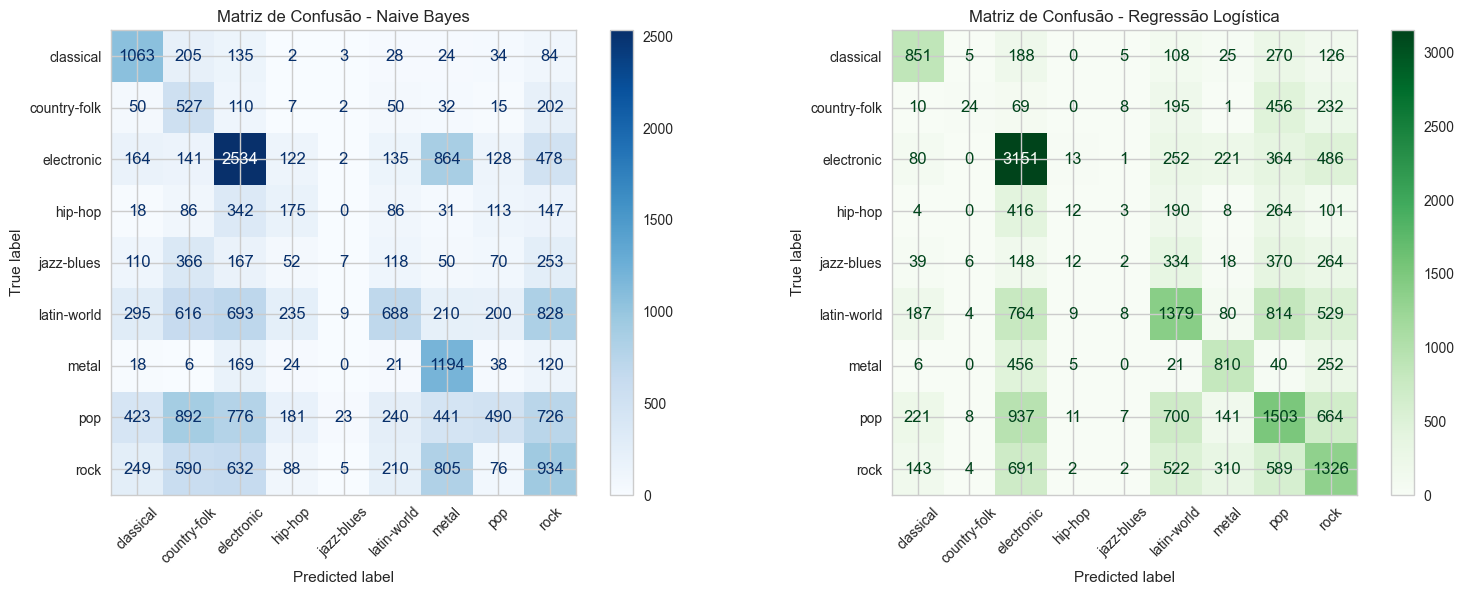

Modelo               Accuracy     Precision    Recall       F1-Score     AUC-ROC     
-------------------------------------------------------------------------------------
Baseline             20.32%       -            -            -            -           
Naive Bayes          33.87%       36.12%       33.87%       30.88%       0.7289      
Logística            40.30%       37.61%       40.30%       37.09%       0.7583      


In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cm_nb = confusion_matrix(y_test_c, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=le.classes_)
disp_nb.plot(ax=axes[0], cmap='Blues', xticks_rotation=45)
axes[0].set_title('Matriz de Confusão - Naive Bayes')

cm_lr = confusion_matrix(y_test_c, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_)
disp_lr.plot(ax=axes[1], cmap='Greens', xticks_rotation=45)
axes[1].set_title('Matriz de Confusão - Regressão Logística')

plt.tight_layout()
plt.show()


# Naive Bayes principalmente bom em classical e metal e eletronica
# confunde muito metal, rock e latin-world, isso pode ser devido aos agrupamentos realizados, mas tambem por sua diversidade e similaridade dentro de generos diferentes

print(f"{'Modelo':<20} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'AUC-ROC':<12}")
print("-"*85)
print(f"{'Baseline':<20} {'20.32%':<12} {'-':<12} {'-':<12} {'-':<12} {'-':<12}")
print(f"{'Naive Bayes':<20} {'33.87%':<12} {'36.12%':<12} {'33.87%':<12} {'30.88%':<12} {'0.7289':<12}")
print(f"{'Logística':<20} {'40.30%':<12} {'37.61%':<12} {'40.30%':<12} {'37.09%':<12} {'0.7583':<12}")

##### Otimizações

---

## 6. Otimização de Modelos

Aplicando técnicas de regularização e busca de hiperparâmetros para melhorar os modelos.

### 6.1 Cross-Validation (5-fold)

Validação cruzada para verificar a estabilidade dos modelos.


In [64]:
# vamos tentar otimizar os modelos

reg_models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
}


for name, model in reg_models.items():
    # cross validation para ver a estabilidade do modelo, cv (cross validation) é o numero de folds (partições) que o modelo vai ser treinado e testado
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name:<15} {scores.mean():<15.4f} {scores.std():<15.4f}")

# resultados muito parecidos e baixos, era esperado devido ao baixo poder preditivo das features

Linear          0.2557          0.0082         
Ridge           0.2557          0.0082         
Lasso           0.2528          0.0089         


In [65]:
class_models = {
    'Naive Bayes': GaussianNB(),
    'Logística': LogisticRegression(max_iter=1000, random_state=42),
}

print(f"{'Modelo':<15} {'Accuracy Média':<18} {'Desvio Padrão':<15}")
print("-"*48)

for name, model in class_models.items():
    scores = cross_val_score(model, X_train_scaled, y_train_c, cv=5, scoring='accuracy')
    print(f"{name:<15} {scores.mean():<18.4f} {scores.std():<15.4f}")

Modelo          Accuracy Média     Desvio Padrão  
------------------------------------------------
Naive Bayes     0.3350             0.0040         
Logística       0.3991             0.0049         


In [ ]:
from pycaret.regression import setup, compare_models, tune_model, pull
df_pycaret_reg = X_train.copy()
df_pycaret_reg['popularity'] = y_train.values

# Setup
reg_setup = setup(
    data=df_pycaret_reg,
    target='popularity',
    session_id=42,
    verbose=False
)

# Comparar modelos
print("Comparando modelos de regressão...")
best_reg = compare_models(n_select=1)

# Ver resultados
results_reg = pull()
print(results_reg)

# resultado: random forest é o melhor modelo, +71% melhor comparado que o baseline, consegue pegar melhor relações não lineares, vamos focar nesse modelo para tunar

Comparando modelos de regressão...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,11.4551,279.9759,16.7312,0.4375,1.1033,0.8038,6.4310
et,Extra Trees Regressor,11.2075,294.7380,17.1661,0.4079,1.0639,0.7907,1.7670
lightgbm,Light Gradient Boosting Machine,13.4085,333.1419,18.2512,0.3307,1.3026,1.0211,0.3220
gbr,Gradient Boosting Regressor,13.9664,360.1090,18.9757,0.2765,1.3432,1.0868,1.4690
lr,Linear Regression,14.1201,370.0253,19.2353,0.2565,1.3538,1.0989,0.3200
ridge,Ridge Regression,14.1201,370.0253,19.2353,0.2565,1.3538,1.0989,0.0080
br,Bayesian Ridge,14.1200,370.0272,19.2353,0.2565,1.3537,1.0985,0.0080
lar,Least Angle Regression,14.1232,370.0832,19.2368,0.2564,1.3542,1.1001,0.0080
en,Elastic Net,14.1782,371.6031,19.2762,0.2534,1.3527,1.0948,0.0080
llar,Lasso Least Angle Regression,14.1782,371.6033,19.2762,0.2534,1.3527,1.0948,0.0080


                                    Model      MAE        MSE     RMSE  \
rf                Random Forest Regressor  11.4551   279.9759  16.7312   
et                  Extra Trees Regressor  11.2075   294.7380  17.1661   
lightgbm  Light Gradient Boosting Machine  13.4085   333.1419  18.2512   
gbr           Gradient Boosting Regressor  13.9664   360.1090  18.9757   
lr                      Linear Regression  14.1201   370.0253  19.2353   
ridge                    Ridge Regression  14.1201   370.0253  19.2353   
br                         Bayesian Ridge  14.1200   370.0272  19.2353   
lar                Least Angle Regression  14.1232   370.0832  19.2368   
en                            Elastic Net  14.1782   371.6031  19.2762   
llar         Lasso Least Angle Regression  14.1782   371.6033  19.2762   
lasso                    Lasso Regression  14.1782   371.6033  19.2762   
huber                     Huber Regressor  13.9995   375.1952  19.3692   
ada                    AdaBoost Regres

### 6.2 PyCaret - AutoML para Regressão

Utilizando PyCaret para comparar automaticamente diversos modelos de regressão.

**Melhor Modelo:** Random Forest Regressor
- R² = 0.4375 (71% melhor que o baseline)
- Captura relações não-lineares que modelos lineares não conseguem


In [3]:
# Salvar modelo e resultados para não precisar executar novamente
from pycaret.regression import save_model, load_model
import os

# Criar pasta para salvar os modelos
os.makedirs('../models', exist_ok=True)

# Salvar o melhor modelo
save_model(best_reg, '../models/best_reg_model')

# Salvar os resultados da comparação
results_reg.to_csv('../models/results_reg_comparison.csv', index=True)

print("✅ Modelo salvo em: ../models/best_reg_model.pkl")
print("✅ Resultados salvos em: ../models/results_reg_comparison.csv")


NameError: name 'best_reg' is not defined

In [ ]:
# from pycaret.regression import load_model
# import pandas as pd
#
# # Carregar o modelo salvo
# best_reg = load_model('../models/best_reg_model')
#
# # Carregar os resultados da comparação
# results_reg = pd.read_csv('../models/results_reg_comparison.csv', index_col=0)
# print(results_reg)


### 6.3 Tuning do Random Forest

Tentativa de otimizar hiperparâmetros do melhor modelo (Random Forest).

**Resultado:** O modelo tunado não superou o modelo com parâmetros default. Isso demonstra que nem sempre a otimização de hiperparâmetros resulta em ganhos.


In [ ]:
# tunar o melhor modelo
tuned_rf = tune_model(best_reg)

tuned_results = pull()
print(tuned_results)
# O processo de tuning com RandomizedSearchCV (10 iterações × 10 folds) não superou o modelo base. O Random Forest com parâmetros default obteve R² = 0.44, enquanto o modelo tunado alcançou apenas R² = 0.33. Isso demonstra que nem sempre otimização de hiperparâmetros resulta em ganhos, especialmente quando os parâmetros default já são adequados para o problem

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.4185,330.8328,18.1888,0.3383,1.2831,1.0017
1,13.5971,334.0556,18.2772,0.3298,1.3310,1.0884
2,13.7236,340.2923,18.4470,0.3223,1.3305,1.0899
3,13.6065,335.1452,18.3070,0.3265,1.3090,0.9605
4,13.5310,331.4145,18.2048,0.3341,1.3190,1.0710
5,13.5055,333.0493,18.2496,0.3345,1.3083,1.0101
6,13.6328,339.5974,18.4282,0.3204,1.3378,1.0130
7,13.8800,349.2438,18.6881,0.3112,1.3245,1.1951
8,13.2683,326.3980,18.0665,0.3250,1.2954,1.0652


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
          MAE       MSE     RMSE      R2   RMSLE    MAPE
Fold                                                    
0     13.4185  330.8328  18.1888  0.3383  1.2831  1.0017
1     13.5971  334.0556  18.2772  0.3298  1.3310  1.0884
2     13.7236  340.2923  18.4470  0.3223  1.3305  1.0899
3     13.6065  335.1452  18.3070  0.3265  1.3090  0.9605
4     13.5310  331.4145  18.2048  0.3341  1.3190  1.0710
5     13.5055  333.0493  18.2496  0.3345  1.3083  1.0101
6     13.6328  339.5974  18.4282  0.3204  1.3378  1.0130
7     13.8800  349.2438  18.6881  0.3112  1.3245  1.1951
8     13.2683  326.3980  18.0665  0.3250  1.2954  1.0652
9     13.4381  326.6472  18.0734  0.3338  1.3205  1.0153
Mean  13.5602  334.6676  18.2931  0.3276  1.3159  1.0510
Std    0.1618    6.5546   0.1785  0.0078  0.016

In [14]:
# GridSearchCV


# Parâmetros para testar
param_grid = {
    'C': [0.01, 0.1, 1, 10], # Regularização
    'penalty': ['l1', 'l2'], # Tipo de regularização
    'solver': ['liblinear', 'saga'] # Algoritmo de otimização
}

# Grid Search
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Executando Grid Search para Logística...")
grid_lr.fit(X_train_scaled, y_train_c)

print(f"\nMelhores parâmetros: {grid_lr.best_params_}")
print(f"Melhor accuracy (CV): {grid_lr.best_score_:.4f}")
print(f"Accuracy original: 0.3991")




Executando Grid Search para Logística...

Melhores parâmetros: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Melhor accuracy (CV): 0.3991
Accuracy original: 0.3991


### 6.4 Grid Search para Regressão Logística

Busca exaustiva de hiperparâmetros para o modelo de classificação.


In [15]:
y_pred_tuned = grid_lr.predict(X_test_scaled)

acc_tuned = accuracy_score(y_test_c, y_pred_tuned)
f1_tuned = f1_score(y_test_c, y_pred_tuned, average='weighted')

print("="*60)
print("COMPARATIVO - LOGÍSTICA")
print("="*60)
print(f"{'Métrica':<15} {'Original':<15} {'Otimizado':<15}")
print("-"*45)
print(f"{'Accuracy':<15} {0.4030:<15.4f} {acc_tuned:<15.4f}")
print(f"{'F1-Score':<15} {0.3709:<15.4f} {f1_tuned:<15.4f}")

COMPARATIVO - LOGÍSTICA
Métrica         Original        Otimizado      
---------------------------------------------
Accuracy        0.4030          0.4033         
F1-Score        0.3709          0.3713         


### 6.5 Comparação Final de Classificadores

Testando diferentes algoritmos de classificação para encontrar o melhor modelo.


In [ ]:
classificadores = {
    'Logística (tunada)': grid_lr.best_estimator_,
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, random_state=42),
}

print("="*60)
print("COMPARAÇÃO DE CLASSIFICADORES (5-fold CV)")
print("="*60)
print(f"{'Modelo':<25} {'Accuracy':<15} {'Desvio':<15}")
print("-"*55)

for nome, modelo in classificadores.items():
    scores = cross_val_score(modelo, X_train_scaled, y_train_c, cv=5, scoring='accuracy', n_jobs=-1)
    print(f"{nome:<25} {scores.mean():<15.4f} {scores.std():<15.4f}")

COMPARAÇÃO DE CLASSIFICADORES (5-fold CV)
Modelo                    Accuracy        Desvio         
-------------------------------------------------------
Logística (tunada)        0.3991          0.0049         
Random Forest             0.5234          0.0073         
Gradient Boosting         0.4895          0.0037         
SVM                       0.4530          0.0041         


In [22]:


# Espaço de hiperparâmetros
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_dist_rf,
    n_iter=20,  # 20 combinações
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Otimizando Random Forest...")
rf_random.fit(X_train_scaled, y_train_c)

print(f"\nMelhores parâmetros: {rf_random.best_params_}")
print(f"Melhor accuracy (CV): {rf_random.best_score_:.4f}")
print(f"Accuracy original: 0.5234")

Otimizando Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Melhores parâmetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 25, 'class_weight': None}
Melhor accuracy (CV): 0.5459
Accuracy original: 0.5234


---

## 7. Conclusões

### 📊 Principais Descobertas

#### Análise Exploratória
- O dataset contém **114.000 músicas** distribuídas em **114 gêneros**
- **Nenhuma feature de áudio** tem correlação forte com popularidade (máximo: 0.092)
- A popularidade musical depende mais de fatores externos (artista, marketing) do que características técnicas
- `genre_popularity` (target encoding) foi a única feature significativa (r = 0.503)

#### Testes Estatísticos
- ✅ **T-Test:** Músicas explícitas têm popularidade significativamente diferente
- ✅ **ANOVA:** Existem diferenças significativas de popularidade entre gêneros
- ✅ **Chi²:** Existe associação forte entre gênero e conteúdo explícito

### 📈 Resultados dos Modelos

#### Regressão (Prever Popularidade)

| Modelo | MAE | RMSE | R² |
|--------|-----|------|-----|
| Baseline (média) | 18.87 | 22.28 | 0.00 |
| Linear Simples | 14.11 | 19.26 | 0.25 |
| Linear Múltipla | 14.08 | 19.23 | 0.26 |
| Polinomial | 14.10 | 19.22 | 0.26 |
| **Random Forest** | **11.46** | **16.73** | **0.44** |

**Melhor modelo:** Random Forest Regressor (R² = 0.44, 71% melhor que o baseline)

#### Classificação (Prever Gênero)

| Modelo | Accuracy | AUC-ROC |
|--------|----------|---------|
| Baseline | 20.32% | - |
| Naive Bayes | 33.87% | 0.73 |
| Logística | 40.30% | 0.76 |
| Gradient Boosting | 48.95% | - |
| **Random Forest (tunado)** | **54.59%** | - |

**Melhor modelo:** Random Forest Classifier (Accuracy = 54.59%)

### 💡 Insights Finais

1. **Modelos não-lineares** (Random Forest, Gradient Boosting) superam significativamente os lineares
2. **Otimização de hiperparâmetros** nem sempre melhora o modelo (Random Forest Regressor)
3. A **dificuldade em prever popularidade** confirma que características de áudio sozinhas não determinam o sucesso de uma música
4. Na **classificação de gêneros**, modelos ensemble conseguem ~55% de accuracy com apenas features de áudio

### 🚀 Trabalhos Futuros

- Incluir features de artista (seguidores, histórico)
- Análise de séries temporais (tendências de popularidade)
- Adicionar features de letras (NLP)
- Testar modelos de Deep Learning para captura de padrões complexos
